In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Data_Cleaner import data_loader_main
import pysindy as psd
from SINDy import SINDy_Train
from utilis_2D import params

In [2]:
total_sim_step = params['total_sim_step']
control_interval = params['control_interval']
burnin_step = params['burnin_step']
burnin_control_step = int(burnin_step/control_interval) # calculate the control step that are within the burnin period

In [3]:
flow_all, _, occupancy_all, flow_dt, _, occupancy_dt = data_loader_main(csv_dict='Sim_Results/Ramp_ALIANA')
flow_all_MPC, _, occupancy_all_MPC, flow_dt_MPC, _, occupancy_dt_MPC = data_loader_main(csv_dict='Sim_Results/Ramp_MPCRefine4')

In [4]:
control_input = pd.read_csv('Results/Meter_Rate_ALIANA.csv')
control_input = control_input/10

control_input_MPC = pd.read_csv('Results/Meter_Rate_MPCRefine4.csv')
control_input_MPC = control_input_MPC/10

In [5]:
occupancy_all.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)
occupancy_dt.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)

occupancy_all_MPC.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)

occupancy_dt_MPC.rename(columns={"H10E_1": "CA-134E #1", "H10E_2": "CA-134E #2", "H10E_3": "CA-134E #3", "H15N_1": "I-5N #1", "H15N_2": "I-5N #2", "H25S_1": "CA-2S #1", "H25S_2": "CA-2S #2", "H25S_3": "CA-2S #3"}, inplace=True)

In [6]:
occupancy_all, occupancy_dt = occupancy_all.iloc[burnin_control_step:, :], occupancy_dt.iloc[burnin_control_step:, :]
control_input = control_input.iloc[burnin_control_step:, :]

occupancy_all_MPC, occupancy_dt_MPC = occupancy_all_MPC.iloc[burnin_control_step:, :], occupancy_dt_MPC.iloc[burnin_control_step:, :]
control_input_MPC = control_input_MPC.iloc[burnin_control_step:, :]

occupancy_all, occupancy_dt = occupancy_all.iloc[:-1, :].reset_index(drop=True), occupancy_dt.iloc[:-1, :].reset_index(drop=True)
control_input = control_input.iloc[1:,:].reset_index(drop=True)

occupancy_all_MPC, occupancy_dt_MPC = occupancy_all_MPC.iloc[:-1, :].reset_index(drop=True), occupancy_dt_MPC.iloc[:-1, :].reset_index(drop=True)
control_input_MPC = control_input_MPC.iloc[1:,:].reset_index(drop=True)

## SINDY

In [70]:
model = SINDy_Train(x = occupancy_all, dx = occupancy_dt, u = control_input, threshold= 0, polydegree= 1)

In [71]:
model.print()

(x0)' = -0.071 1 + 0.392 x0 + -0.074 x1 + -0.001 x2 + -1.513 x3 + -0.038 x4 + 0.085 x5 + 0.192 x6 + 0.196 x7 + 0.163 u0 + 0.009 u1 + -0.010 u2 + -0.008 u3 + 0.013 u4 + -1.419 u5
(x1)' = -0.028 1 + -0.053 x0 + -0.070 x1 + -0.351 x2 + 2.505 x3 + 0.535 x4 + 0.354 x5 + -0.277 x6 + -0.291 x7 + -0.034 u0 + -0.071 u1 + -0.046 u2 + 0.135 u3 + 0.013 u4 + -0.557 u5
(x2)' = -0.183 1 + -0.082 x0 + 0.347 x1 + 0.205 x2 + 4.729 x3 + 0.119 x4 + -0.277 x5 + 0.287 x6 + -0.044 x7 + 0.091 u0 + -0.039 u1 + 0.041 u2 + 0.036 u3 + -0.025 u4 + -3.663 u5
(x3)' = 0.001 1 + 0.019 x0 + -0.008 x1 + -0.009 x2 + -0.021 x3 + -0.011 x4 + 0.004 x5 + -0.007 x6 + 0.045 x7 + -0.001 u0 + 0.002 u1 + -0.001 u2 + -0.002 u3 + 0.001 u4 + 0.011 u5
(x4)' = -0.105 1 + 0.524 x0 + -0.082 x1 + -0.088 x2 + 0.495 x3 + 0.209 x4 + 0.106 x5 + 0.149 x6 + 0.265 x7 + 0.095 u0 + -0.016 u1 + -0.017 u2 + 0.129 u3 + 0.046 u4 + -2.092 u5
(x5)' = -0.019 1 + -0.014 x0 + 0.013 x1 + 0.090 x2 + -0.784 x3 + 0.149 x4 + 0.342 x5 + -0.165 x6 + -0.022 x7 + 

In [72]:
# Predict derivatives using the learned model
occupancy_dt_pred = pd.DataFrame(model.predict(occupancy_all, u=control_input))
# occupancy_dt_test_pred = pd.DataFrame(model.predict(occupancy_all_test, u=control_input_test))
# flow_dt_pred = model.predict(flow_all, u=control_input)

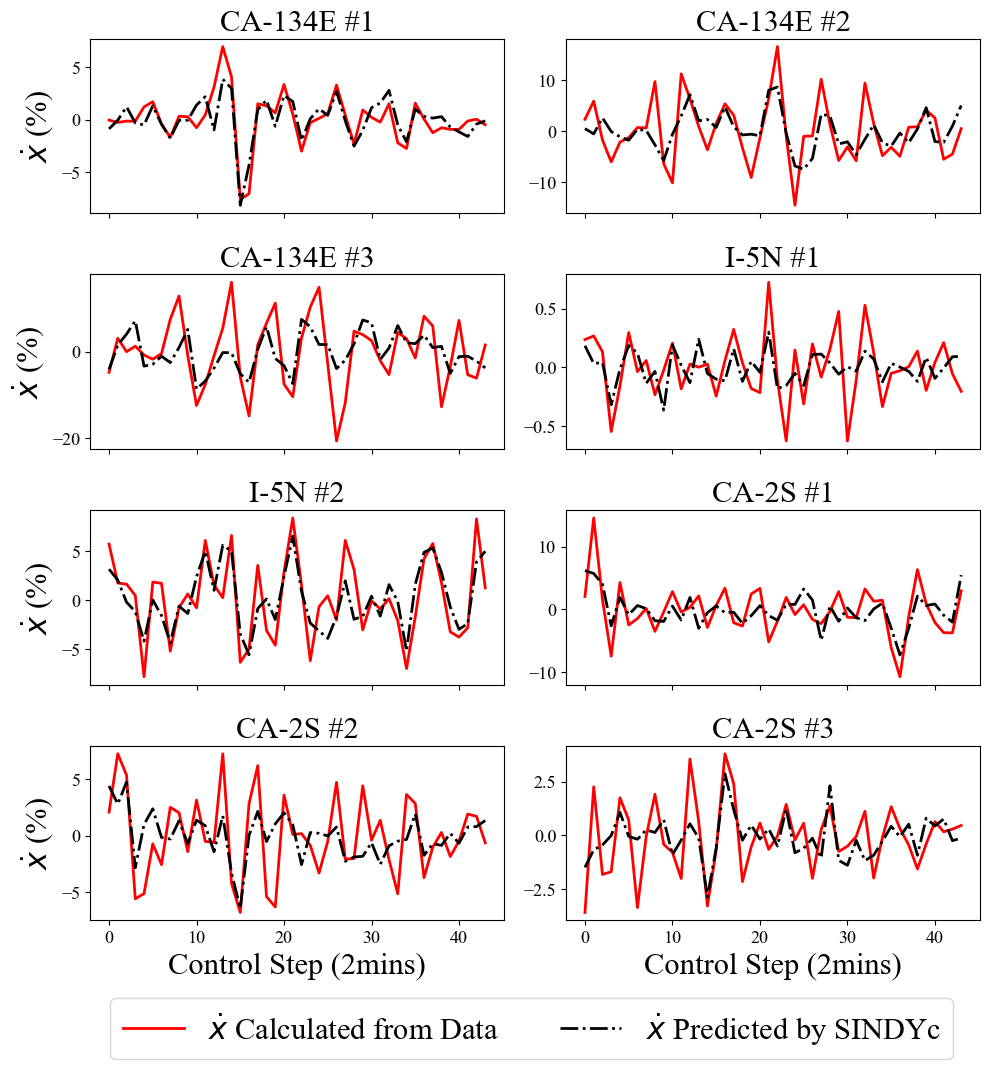

In [74]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 10), sharex=True, sharey=False)
# Plot each column in a separate subplot
for row in range(4):
    for col in range(2):
        index = row*2 + col
        axs[row, col].plot(occupancy_dt.iloc[:, index], "-", label = '$\dot{x}$ Calculated from Data', color = "red",linewidth=2)
        axs[row, col].plot(occupancy_dt_pred.iloc[:, index], "-.", label = '$\dot{x}$ Predicted by SINDYc', color = "black", linewidth=2)
        axs[row, col].set_title(occupancy_all.columns[index], fontsize=22)
        axs[row, col].tick_params(axis='both', labelsize=13)

for col in range(2):
    axs[3,col].set_xlabel('Control Step (2mins)', fontsize = 22)

for row in range(4):
    axs[row,0].set_ylabel('$\dot{x}$ (%)', fontsize = 22)
    
handles, labels = axs[0,0].get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.1,-0.08), fontsize=22, ncol = 3)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.35, wspace=0.15)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
fig.savefig('Figures/SINDy_Predict.png', dpi=300, bbox_inches='tight')

In [69]:
occupancy_dt_select = occupancy_dt.iloc[:, [2, 4, 5, 6]]
occupancy_dt_pred_select = occupancy_dt_pred.iloc[:, [2, 4, 5, 6]]

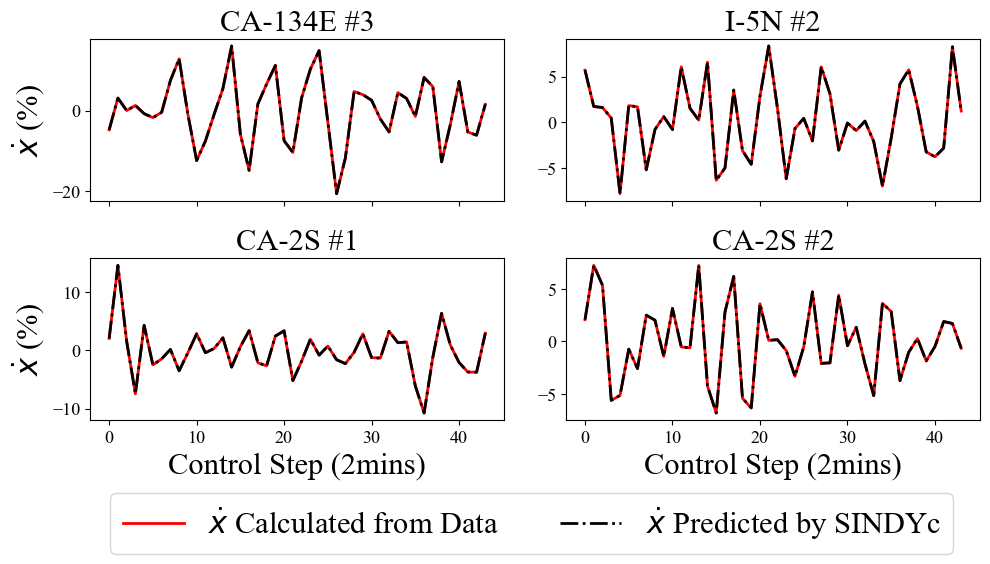

In [38]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5), sharex=True, sharey=False)
# Plot each column in a separate subplot
for row in range(2):
    for col in range(2):
        index = row*2 + col
        axs[row, col].plot(occupancy_dt_select.iloc[:, index], "-", label = '$\dot{x}$ Calculated from Data', color = "red",linewidth=2)
        axs[row, col].plot(occupancy_dt_pred_select.iloc[:, index], "-.", label = '$\dot{x}$ Predicted by SINDYc', color = "black", linewidth=2)
        axs[row, col].set_title(occupancy_dt_select.columns[index], fontsize=22)
        axs[row, col].tick_params(axis='both', labelsize=13)

for col in range(2):
    axs[1,col].set_xlabel('Control Step (2mins)', fontsize = 22)

for row in range(2):
    axs[row,0].set_ylabel('$\dot{x}$ (%)', fontsize = 22)
    
handles, labels = axs[0,0].get_legend_handles_labels()
lgd = fig.legend(handles, labels, loc='lower left', bbox_to_anchor=(0.1,-0.15), fontsize=22, ncol = 3)
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.35, wspace=0.15)
plt.rcParams['font.family'] = 'Times New Roman'
plt.show()
# fig.savefig('Figures/SINDy_Predict.png', dpi=300, bbox_inches='tight')